# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Load and understand the data

In [2]:
# Read data from text file
data_path = '../../../../../data/classification/SMSSpamCollection'
data = pd.read_csv(data_path, sep='\t', header=None, names=['label', 'text'])

# Map 'ham' to 0 and 'spam' to 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [4]:
data.isnull().sum()

label    0
text     0
dtype: int64

# Split the data

In [5]:
# Split the data into training and testing sets with a ratio of (8|2)
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Feature extraction

In [6]:
vectorizer = CountVectorizer()

In [7]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
vectorizer.get_feature_names_out()

array(['00', '000', '000pes', ..., 'zyada', 'èn', 'ú1'], dtype=object)

In [9]:
X_train = X_train_vectorized.toarray()
X_test = X_test_vectorized.toarray()
print(X_train[:3])
print(X_test[:3])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Train the model

In [10]:
perceptron = Perceptron(eta0=0.1)

In [11]:
perceptron.fit(X_train_vectorized, y_train)

Perceptron(eta0=0.1)

# Define a function to evaluate the model

In [12]:
def evaluate_model(y_true, y_pred, dataset_name=""):
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, square=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {dataset_name} Dataset')
    plt.show()
    
    # Calculate accuracy and F1 score
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy Score for {dataset_name} Dataset: {acc}")
    print(f"F1 Score for {dataset_name} Dataset: {f1}")

# Evaluate the model

## Evaluate on the training set

Input: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Output: [1 0 0 0 1 0 0 1 0]
True value: [1 0 0 0 1 0 0 1 0]


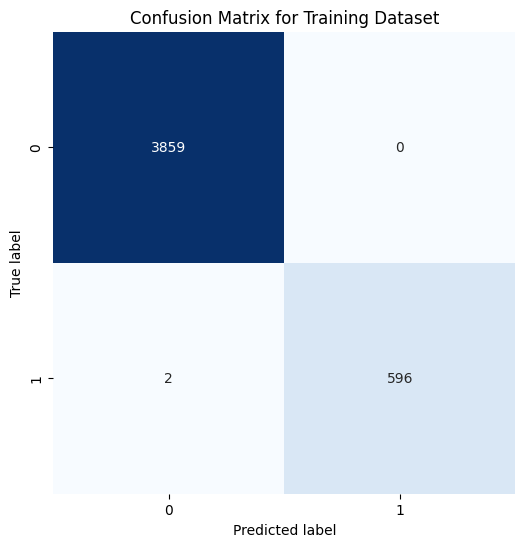

Accuracy Score for Training Dataset: 0.9995512676688355
F1 Score for Training Dataset: 0.998324958123953


In [13]:
y_pred_train = perceptron.predict(X_train_vectorized)

# Check the first 10 instances
print("Input: " + str(X_train[0:9]))
print("Output: " + str(y_pred_train[0:9]))
print("True value: " + str(y_train[0:9].values))
evaluate_model(y_train, y_pred_train, dataset_name="Training")

## Evaluate on the test set

Input: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Output: [0 0 0 0 0 0 0 0 0]
True value: [0 0 0 0 0 0 0 0 0]


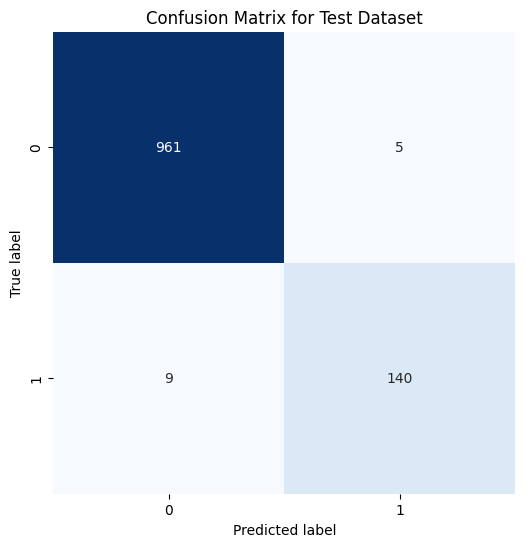

Accuracy Score for Test Dataset: 0.9874439461883409
F1 Score for Test Dataset: 0.9523809523809523


In [14]:
y_pred_test = perceptron.predict(X_test_vectorized)

# Check the first 10 instances
print("Input: " + str(X_test[0:9]))
print("Output: " + str(y_pred_test[0:9]))
print("True value: " + str(y_test[0:9].values))
evaluate_model(y_test, y_pred_test, dataset_name="Test")

# Make a prediction on a new data point

In [15]:
dict_labels = {0: "NO", 1: "YES"}

# New email is a spam email
new_email = ["Congratulations! You have been selected to receive a free $1000 gift card. This is a limited time offer exclusively for our loyal users. To claim your free gift card, simply click on the link below and complete the short survey. It only takes a few minutes, and your gift card will be emailed to you instantly."]
new_data_point = vectorizer.transform(new_email)
predicted = perceptron.predict(new_data_point)
print(f"Prediction: Is this email spam? {dict_labels[predicted[0]]}")

Prediction: Is this email spam? YES
